In [23]:
import pandas as pd

In [24]:
# read data
df = pd.read_csv("DisneylandReviews.csv", encoding='ISO-8859-1')
reviews_df = df[df["Year_Month"] != "missing"]

In [25]:
# split year_month to year and month columns
reviews_df[['Year','Month']] = reviews_df["Year_Month"].str.split("-",expand=True,)
# delete year_month column
del reviews_df['Year_Month']
reviews_df.head()

C:\Users\Ryan\anaconda3\envs\PythonAdv\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4


In [26]:
# create the label
reviews_df["is_good_review"] = reviews_df["Rating"].apply(lambda x: 1 if x > 3 else 0)
reviews_df.head()

C:\Users\Ryan\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,is_good_review
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4,1
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5,1
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4,1
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4,1
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4,1


In [27]:
# get a sample
reviews_df = reviews_df.sample(frac = 0.1, replace = False, random_state=42)

In [28]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [29]:
import string
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ryan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ryan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
# clean text data
reviews_df["review_clean"] = reviews_df["Review_Text"].apply(lambda x: clean_text(x))
reviews_df.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,is_good_review,review_clean
27680,122944085,5,United States,Spotlessly clean and so organized considering ...,Disneyland_California,2011,10,1,spotlessly clean organize consider thousand vi...
35899,290851203,5,United Kingdom,"Pricey but worth it, unfortunately the big thu...",Disneyland_Paris,2015,7,1,pricey worth unfortunately big thunder mountai...
23932,168087311,4,Canada,"Disneyland is a magical place. Everyone, parti...",Disneyland_California,2013,7,1,disneyland magical place everyone particularly...
36122,282417360,5,Pakistan,Disney land is a must when visiting Paris. The...,Disneyland_Paris,2015,6,1,disney land must visit paris frozen show best ...
8028,160953212,3,India,"The HK Disneyland is definitely small, but it'...",Disneyland_HongKong,2012,9,0,hk disneyland definitely small definitely fun ...


In [31]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["Review_Text"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ryan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [32]:
# reviews_df.head()
copy_df = reviews_df.copy()


In [33]:
from textblob import TextBlob
# copy_df1 = copy_df.copy()

reviews_df['polarity'] = reviews_df['review_clean'].map(lambda text: TextBlob(text).sentiment.polarity)
# copy_df1.head()

In [34]:
# add number of characters column
reviews_df["characters"] = reviews_df["Review_Text"].apply(lambda x: len(x))
# copy_df1["characters"] = copy_df["Review_Text"].apply(lambda x: len(x))

# add number of words column
reviews_df["words"] = reviews_df["Review_Text"].apply(lambda x: len(x.split(" ")))
# copy_df1["words"] = copy_df["Review_Text"].apply(lambda x: len(x.split(" ")))


In [35]:
# create doc2vec vector columns
!pip install gensim
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = reviews_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)

In [36]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews_df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)
reviews_df.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,is_good_review,review_clean,neg,...,word_yet,word_york,word_you,word_young,word_yr,word_yrs,word_yum,word_yummy,word_zero,word_zone
27680,122944085,5,United States,Spotlessly clean and so organized considering ...,Disneyland_California,2011,10,1,spotlessly clean organize consider thousand vi...,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35899,290851203,5,United Kingdom,"Pricey but worth it, unfortunately the big thu...",Disneyland_Paris,2015,7,1,pricey worth unfortunately big thunder mountai...,0.115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23932,168087311,4,Canada,"Disneyland is a magical place. Everyone, parti...",Disneyland_California,2013,7,1,disneyland magical place everyone particularly...,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36122,282417360,5,Pakistan,Disney land is a must when visiting Paris. The...,Disneyland_Paris,2015,6,1,disney land must visit paris frozen show best ...,0.028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8028,160953212,3,India,"The HK Disneyland is definitely small, but it'...",Disneyland_HongKong,2012,9,0,hk disneyland definitely small definitely fun ...,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
reviews_df.to_csv('Resources/ReviewAnalysis.csv', index=False)

In [38]:
# show is_good_review distribution
reviews_df["is_good_review"].value_counts(normalize = True)

1    0.803696
0    0.196304
Name: is_good_review, dtype: float64

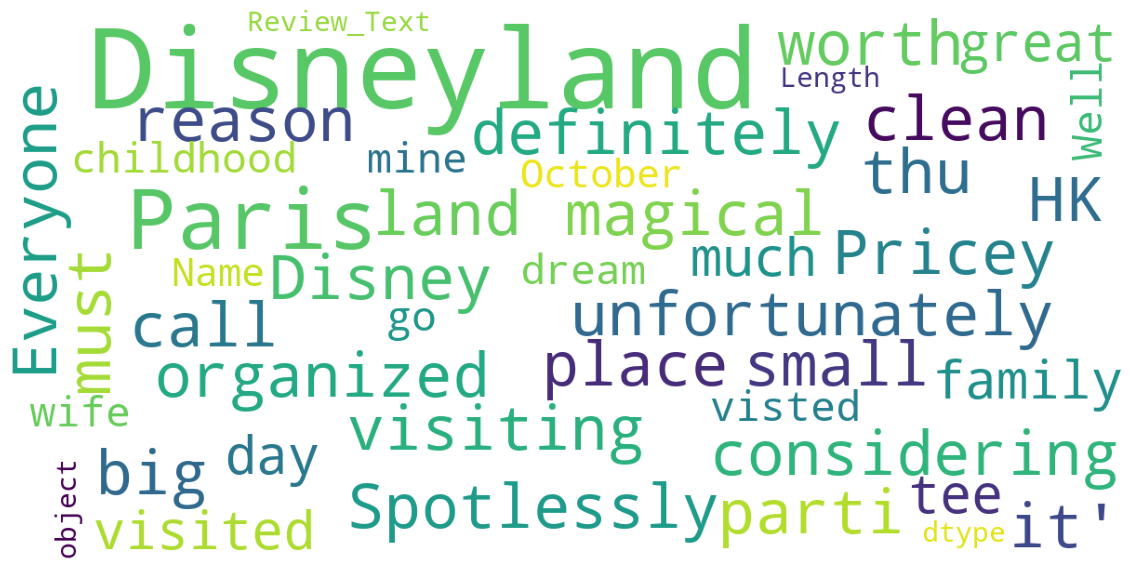

In [39]:
# wordcloud function

!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews_df["Review_Text"])

In [40]:
# highest positive sentiment reviews (with more than 5 words)
reviews_df[reviews_df["words"] >= 5].sort_values("pos", ascending = False)[["Review_Text", "pos", "polarity", "Rating"]].head(10)

,Review_Text,pos,polarity,Rating
31529,"great fun, great characters, great shows and p...",0.686,0.516667,5
26164,Wonderful time!!! Great vacation with family ...,0.671,0.480000,5
10750,Best park ever. In love with every single deta...,0.628,0.451190,5
40925,The park of my dreams. Cheyenne hotel is so a...,0.623,0.391667,5
27097,I loved everything! :) It's the Happiest Plac...,0.587,0.650000,5
10095,"Amazing! Small , easy to navigate with all the...",0.584,0.516667,5
443,the best every to go to the best every the bes...,0.583,1.000000,5
41722,Lovely time. 2nd time here. great rides and st...,0.530,0.650000,5
449,"Love the Princess , Love the show and good pla...",0.528,0.492857,5
38427,Great short break. Definitely a trip for all t...,0.526,0.460000,5


In [41]:
# lowest negative sentiment reviews (with more than 5 words)
reviews_df[reviews_df["words"] >= 5].sort_values("neg", ascending = False)[["Review_Text", "neg", "polarity", "Rating"]].head(10)

,Review_Text,neg,polarity,Rating
42032,Dirty dirty dirty Overpriced poor quality f...,0.495,-0.425000,2
35129,Terrible waste of money . Just want you to sho...,0.362,-0.440000,2
12643,Three year old twins loved it but I was disapp...,0.332,0.143333,4
13048,"Far too many people, rude service, uncomfortab...",0.328,-0.025000,2
40345,Fab time at Disney.... just avoid the restaura...,0.316,0.042857,4
29593,The worst experience what we ever had with kid...,0.301,-0.093000,1
26536,Who doesn't love Disney? A little sad about th...,0.300,0.153125,5
24447,Went here 5 years ago. Princesses was my favor...,0.288,0.000000,5
12547,I was screamed at by one of the staff . Like w...,0.284,0.100000,1
28048,What's not to love? Fun tip: Splash Mountain ...,0.275,0.361905,5


In [42]:
reviews_df[reviews_df["words"] >= 5].sort_values("polarity", ascending = False)[["Review_Text", "pos", "polarity", "Rating"]].head(10)

,Review_Text,pos,polarity,Rating
443,the best every to go to the best every the bes...,0.583,1.000000,5
41210,Everyone must go there. Perfect choice for eve...,0.209,1.000000,5
21431,"The Disneyland Park, events, shows, shopping, ...",0.276,1.000000,5
5234,Excellent to see all my fav childhood characte...,0.254,1.000000,4
16595,Disneyland is simply the best. I am always ver...,0.361,1.000000,5
27333,Everything about Disney is awesome Disney ro...,0.423,1.000000,5
29959,It was amazing and the food choices were the b...,0.404,0.933333,5
2854,Splendid experience to HK Disneyland with 3 ni...,0.361,0.916667,4
7323,Took the grandchildren a couple of times over ...,0.328,0.900000,5
27919,Had a great time in both parks. World of color...,0.488,0.900000,5


In [43]:
reviews_df[reviews_df["words"] >= 5].sort_values("polarity", ascending = True)[["Review_Text", "neg", "polarity", "Rating", "compound"]].head(10)

,Review_Text,neg,polarity,Rating,compound
8581,Such a bad experience. 90% were mainland china...,0.211,-0.483333,2,-0.8834
10539,This is such a disappointment when compared to...,0.210,-0.480000,2,-0.8704
3618,"It's not what you expect from Disneyland, quit...",0.106,-0.479167,2,-0.2516
35129,Terrible waste of money . Just want you to sho...,0.362,-0.440000,2,-0.8638
42032,Dirty dirty dirty Overpriced poor quality f...,0.495,-0.425000,2,-0.9733
23104,"Seriously, how could you go wrong with the hap...",0.137,-0.416667,5,0.6696
24577,We were looking forward to going to Disneyland...,0.130,-0.395000,3,-0.9530
29332,Went there with my wife and 3 children and had...,0.134,-0.377778,4,-0.7575
14965,Besides the ticket fiasco (two hours to get fa...,0.243,-0.375000,2,-0.8720
6287,"It is too crowded, and the waiting time is bet...",0.038,-0.375000,3,-0.0415


C:\Users\Ryan\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Ryan\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


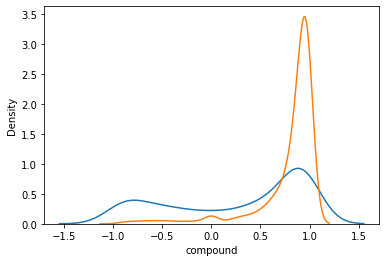

In [44]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = reviews_df[reviews_df['is_good_review'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Bad reviews"
    else:
        label = "Good reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

In [45]:
# feature selection
label = "is_good_review"
ignore_cols = [label, "Review_Text", "review_clean", "Reviewer_Location","Branch",""]
features = [c for c in reviews_df.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 



X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.20, random_state = 42)


In [46]:
reviews_df.dtypes

Review_ID              int64
Rating                 int64
Reviewer_Location     object
Review_Text           object
Branch                object
                      ...   
word_yrs             float64
word_yum             float64
word_yummy           float64
word_zero            float64
word_zone            float64
Length: 2151, dtype: object

In [47]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [48]:
 rf.score(X_train, y_train), rf.score(X_test, y_test)

(1.0, 0.9925093632958801)

In [55]:
predictions = rf.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
23023,1,1
38137,0,0
3931,1,1
8519,1,1
36363,1,1
...,...,...
10627,1,1
36628,0,0
40533,1,1
7048,1,1


In [49]:
# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
1,Rating,0.249662
7,compound,0.040290
4,neg,0.032107
8,polarity,0.027276
6,pos,0.026047
5,neu,0.011791
14,doc2vec_vector_3,0.009045
917,word_hour,0.008687
1360,word_pay,0.005714
1200,word_money,0.005529


In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

In [ ]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    all_score = train_score + test_score
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}, {all_score:.3f}")

In [ ]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
model.score(X_train, y_train),model.score(X_test, y_test)

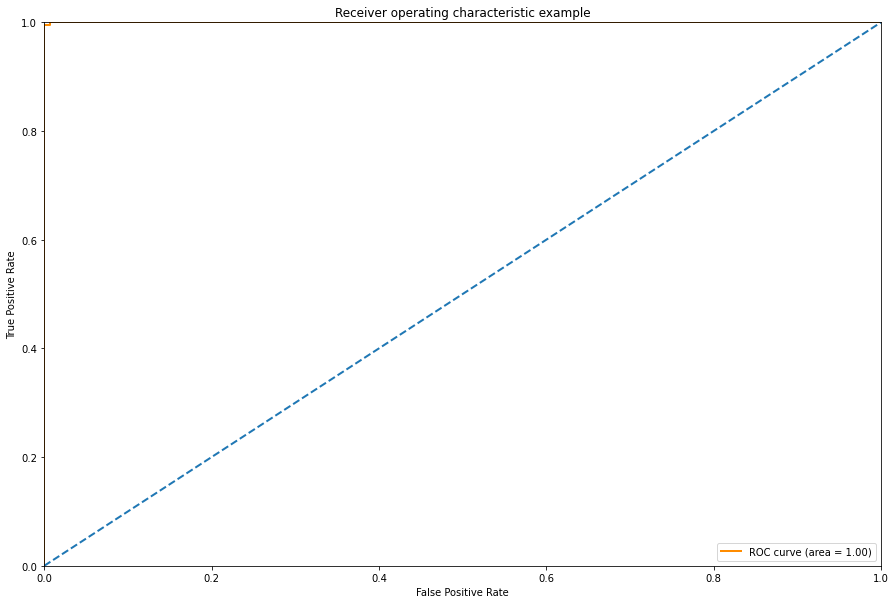

In [28]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train)
predicted_clusters = kmeans.predict(X_test)
predicted_clusters[0]
y_test.tolist()[0]